In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#extracting residuals standardization
train_data_tot = pd.read_csv("train24.csv",header = None)
test_data_tot = pd.read_csv("test24.csv",header = None)

train_data_tot = pd.DataFrame(train_data_tot.to_numpy(),columns=['x','y','label'])
test_data_tot = pd.DataFrame(test_data_tot.to_numpy(),columns=['x','y','label'])
#sampling the train_data
#train_data_tot = train_data_tot.sample(frac=1)

# taking only features for normalization
train_data = train_data_tot[['x','y']]
test_data = test_data_tot[['x','y']].to_numpy()

#splitting the train data into train and validation data
frac = 0.75
validation_data = train_data[int(79*frac):].to_numpy()
train_data = train_data[0:int(79*frac)].to_numpy()

#train data normalization
train_mean = np.mean(train_data,0)
train_data = np.array([i-train_mean for i in train_data])
x = len(train_data)
train_data = train_data/(np.var(train_data,0))**0.5
train_data = pd.DataFrame(train_data,columns = ['x','y'])
train_data['label'] = list(train_data_tot['label'][0:int(79*frac)].values)
train_data = train_data.drop(['y'],axis=1)
#print(train_data)

#test data normalization
test_mean = np.mean(test_data,0)
test_data = np.array([i-test_mean for i in test_data])
x = len(test_data)
test_std = (np.var(test_data,0))**0.5
test_data = (test_data/test_std)
test_data = pd.DataFrame(test_data,columns = ['x','y'])
test_data['label'] = list(test_data_tot['label'].values)
test_data = test_data.drop(['y'],axis=1)

#validation data normalization
validation_mean = np.mean(validation_data,0)
validation_data = np.array([i-validation_mean for i in validation_data])
x = len(validation_data)
validation_data = validation_data/(np.var(validation_data,0))**0.5
validation_data = pd.DataFrame(validation_data,columns = ['x','y'])
validation_data['label'] = list(train_data_tot['label'][int(79*frac):].values)
validation_data = validation_data.drop(['y'],axis=1)

In [3]:
# #min-max scaling normalization

# train_data = pd.read_csv("/content/train24.csv")
# test_data = pd.read_csv("/content/test24.csv").to_numpy

# train_data = train_data.sample(frac=1)

# validation_data = train_data[65:].to_numpy()
# train_data = train_data[0:65].to_numpy()

# #normalizing the train data
# train_max = np.amax(train_data,0)
# train_min = np.amin(train_data,0)
# train_data = np.array([(i-train_min)/(train_max-train_min) for i in train_data])
# train_data = pd.DataFrame(train_data, columns = ['x','y','label'])

# #normalizing the test data
# test_max = np.amax(test_data,0)
# test_min = np.amin(test_data,0)
# test_data = np.array([(i-70722055.83997022test_min)/(test_max-test_min) for i in test_data])
# test_data = pd.DataFrame(test_data, columns = ['x','y','label'])

# #normalizing the validation data
# validation_max = np.amax(validation_data,0)
# validation_min = np.amin(validation_data,0)
# validation_data = np.array([(i-validation_min)/(validation_max-validation_min) for i in validation_data])
# validation_data = pd.DataFrame(validation_data, columns = ['x','y','label'])

In [4]:
class PolynomialRegressor: #ridge regression with lambda 0 for ridge regression you have to add 2*lambda*identity matrix to x*xtranspose
  def __init__(self):
    self.degree = 0
    self.weight = []
    self.mse = 0
    self.feature = []
    self.label = []

  def set_par(self,degree):
    k = (degree+1)*(degree+2)
    self.weight = np.zeros((k//2,1))
    self.degree = degree

  def set_par2(self,degree):
    k = (degree+1)
    self.weight = np.zeros((k,1))
    self.degree = degree

  def fit(self,df,feature,label):
    f = df[feature].to_numpy()
    l = df[label].to_numpy()
    x = np.ones((len(f),len(self.weight)))
    for k in range(len(f)):
      for i in range(self.degree+1):
          x[k][i] = (f[k][0]**(i))
    k = np.transpose(x) #transpose of terms of matrix
    a = np.matmul(k,x)
    b = np.matmul(k,l)
    a_inv = np.linalg.pinv(x)
    self.weight = np.matmul(a_inv,l)
    out = np.matmul(x,self.weight)
    self.mse = np.average(np.square(np.subtract(out,l)))

    return self.mse,out
  
  def predict(self,df,feature,label):
    f = df[feature].to_numpy()
    l = df[label].to_numpy()
    x = np.ones((len(f),len(self.weight)))
    for k in range(len(f)):
      for i in range(self.degree+1):
        x[k][i] = (f[k][0]**(i))
    out = np.matmul(x,self.weight)
    return np.average(np.square(np.subtract(out,l))),out

  def predict2(self,f):
    x = np.ones((len(f),len(self.weight)))
    for k in range(len(f)):
      for i in range(self.degree+1):
        x[k][i] = (f[k]**(i))
    out = np.matmul(x,self.weight)
    return out

  pass

In [5]:
def build_model():
  
  model = PolynomialRegressor()

  return model

def train_model(model, df, feature, label, degree):

  model.set_par2(degree)

  mse,trained_prediction = model.fit(df,feature,label)

  return mse,trained_prediction

In [6]:
def plot_model(degree):

  model = build_model()
  mse, predict_train = train_model(model, train_data, ['x'], ['label'], degree)
  mse_test, predict_test = model.predict(validation_data, ['x'], ['label'])

  fig = plt.figure(figsize=(10,10))

  x = (train_data['x'].to_numpy()).flatten()
  label = (train_data['label'].to_numpy()).flatten()
  x_test = validation_data['x'].to_numpy().flatten()
  label_test = validation_data['label'].to_numpy().flatten()

  x_min,x_max = x.min()-0.1,x.max()+0.1
  xx = np.arange(x_min,x_max,0.01)
  z = np.array(model.predict2(xx))
  z = z.reshape(xx.shape)

  plt.xlabel('x')
  plt.ylabel('label')
  plt.title('train(Degree = %i)'%(degree))
  plt.plot(xx,z,alpha=0.25)

  plt.scatter(x, label)
  plt.scatter(x_test, label_test, marker='x')
  return mse,mse_test,predict_train.flatten(),predict_test.flatten(),model

def best_model():

  train = []
  test = []
  train_out = []
  test_out = []
  a = [1,2,3,4,5,6]

  t = 10
  a = np.arange(1,t+1)
  models = []
  for i in range(0,t):
    x = plot_model(i+1)
    train.append(x[0])
    test.append(x[1])
    train_out.append(x[2])
    test_out.append(x[3])
    models.append(x[4])

  plt.figure(figsize=(10,10))

  plt.xlabel('Degree')
  plt.ylabel('MSE')
  plt.title('MSE vs Degree')

  plt.plot(a[2:],test[2:],label='validation')
  plt.legend()

  plt.figure(figsize=(10,8))

  plt.xlabel('Degree')
  plt.ylabel('MSE')
  plt.title('MSE vs Degree')

  plt.plot(a,train,label='train')
  plt.legend()

  print(test)
  print(train)
  a = np.argmin(np.array(test))
  print(a)
  return train_out[a],models[a]
  
def plot_best():
  out = best_model()
  fig = plt.figure(figsize = (20,10))
  ax = fig.add_subplot(1,2,1)
  bx = fig.add_subplot(1,2,2)

  x = train_data['x'].to_numpy().flatten()
  label_t = out[1].predict(train_data,['x'],['label'])[1]
  label_given = train_data['label'].to_numpy().flatten()
  x_test = test_data['x'].to_numpy().flatten()
  label_test_given = test_data['label'].to_numpy().flatten()
  k = out[1].predict(test_data,['x'],['label'])
  label_test = k[1]
  print(k[0])

  ax.set_xlabel('x')
  ax.set_ylabel('label')
  bx.set_xlabel('x')
  bx.set_ylabel('label')

  ax.set_title('model vs expected - train')
  ax.scatter(x, label_given, color = 'orange',label = 'expected')
  ax.scatter(x, label_t, label = 'model')
  ax.legend()
  
  bx.set_title('model vs expected - test')
  bx.scatter(x_test, label_test_given, label = 'expected')
  bx.scatter(x_test, label_test, label = 'model')
  bx.legend()


[190783200.45287254, 220132235.66795945, 96166379.93960157, 97423625.52137868, 95950879.5534781, 95810163.23238966, 95730418.10315466, 96679925.95023477, 98002606.57225215, 101386500.74848643]
[173349369.05964333, 60739538.12749968, 2153852.291539358, 2140817.406226346, 2123555.5827749027, 2122950.437999189, 2108033.2685064315, 2103658.266569503, 2079797.4391494684, 2011181.0285957665]
6
239853804.9775908


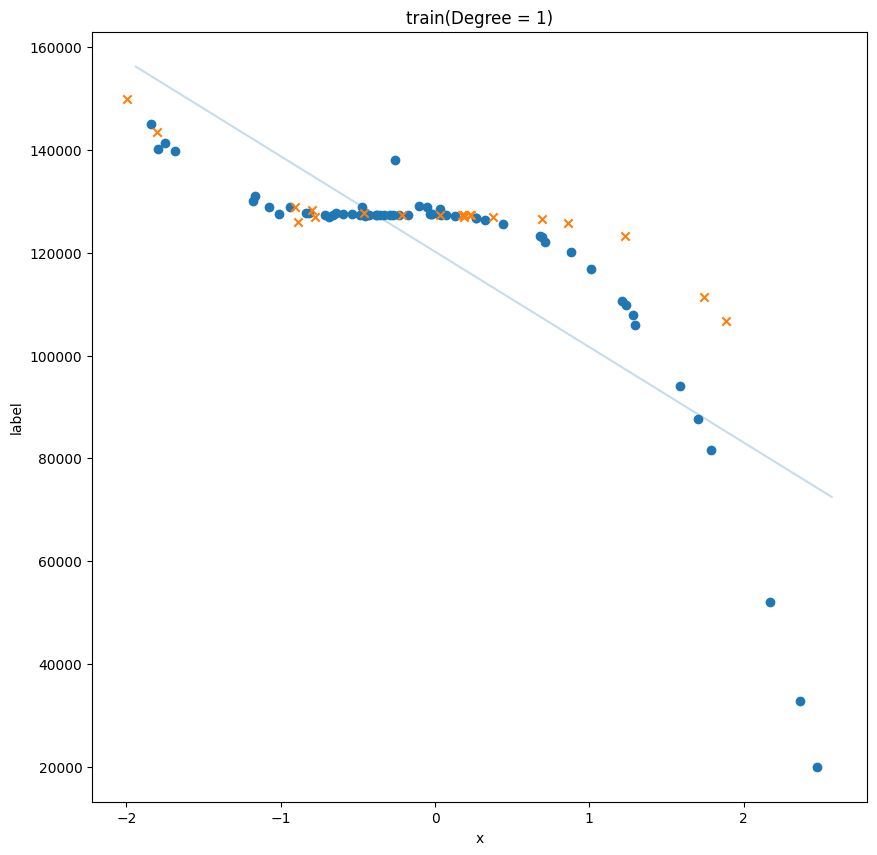

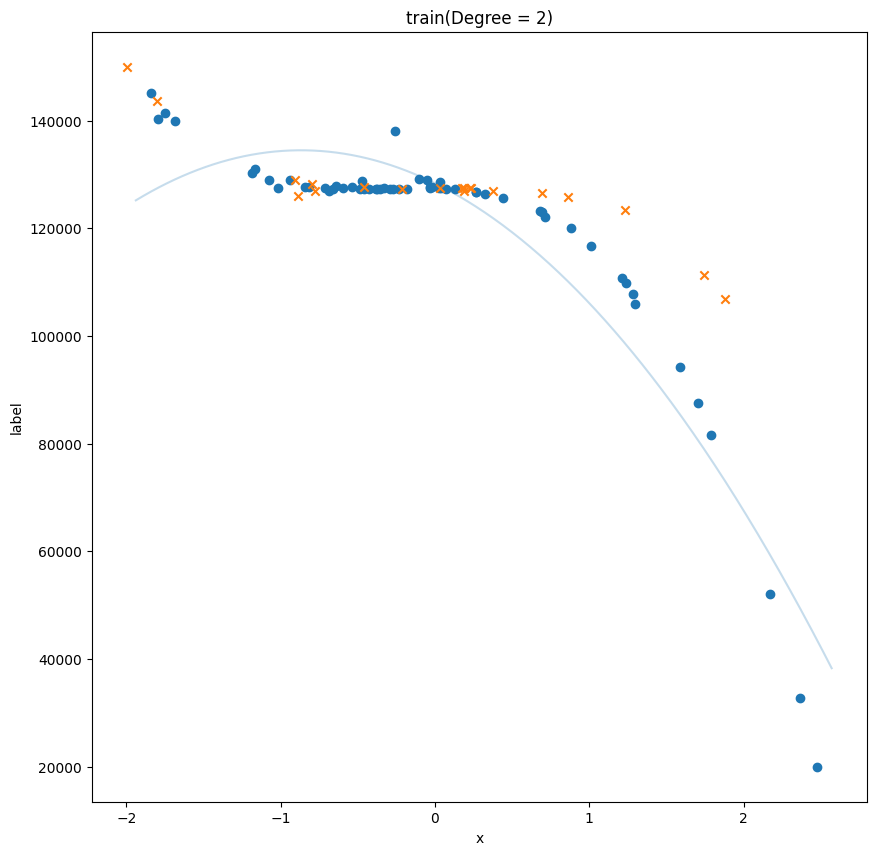

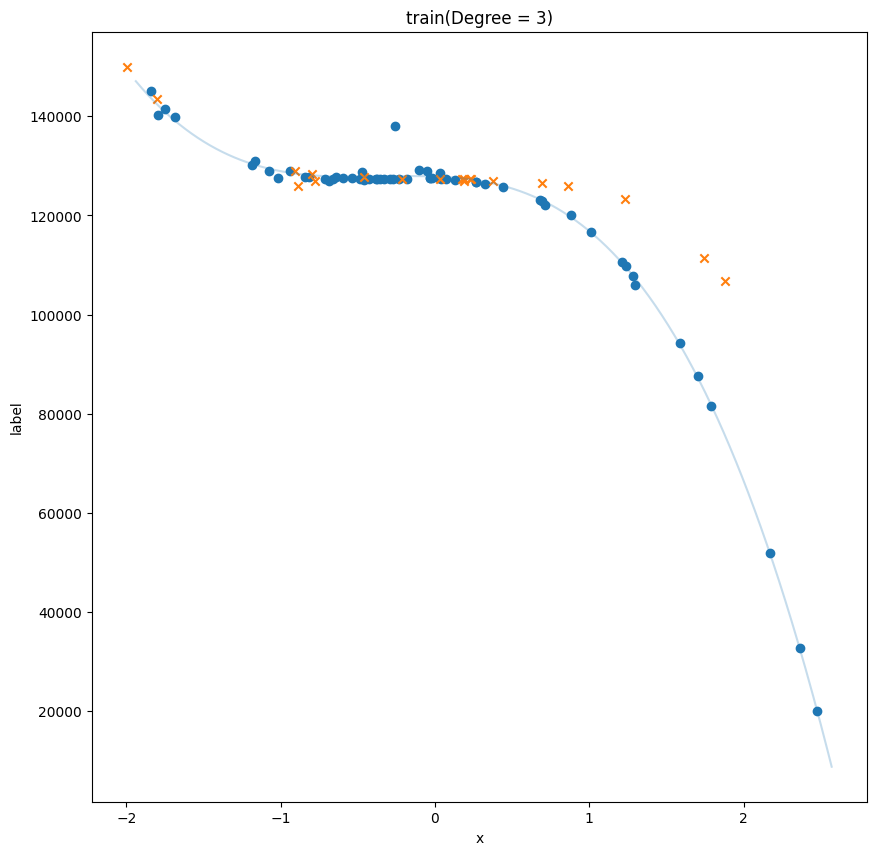

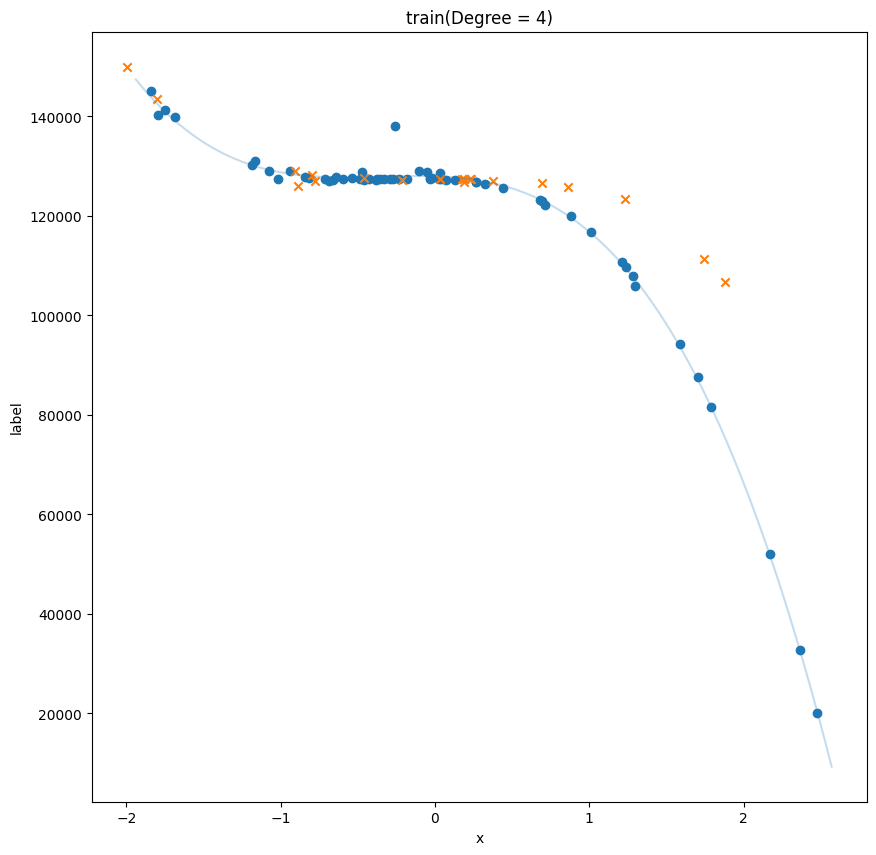

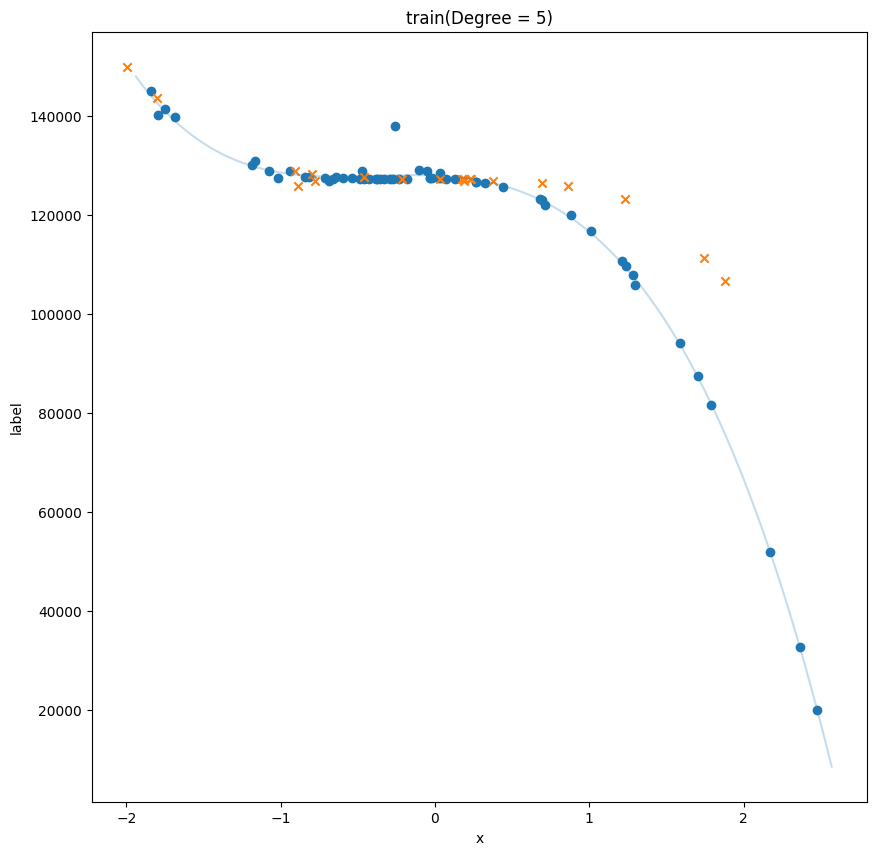

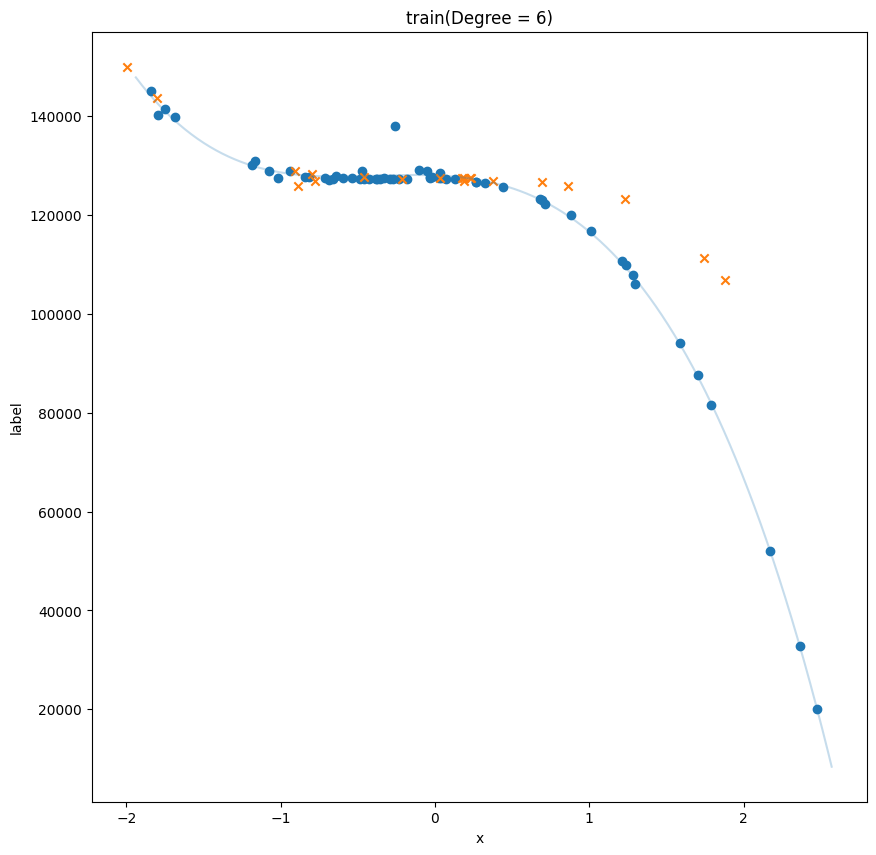

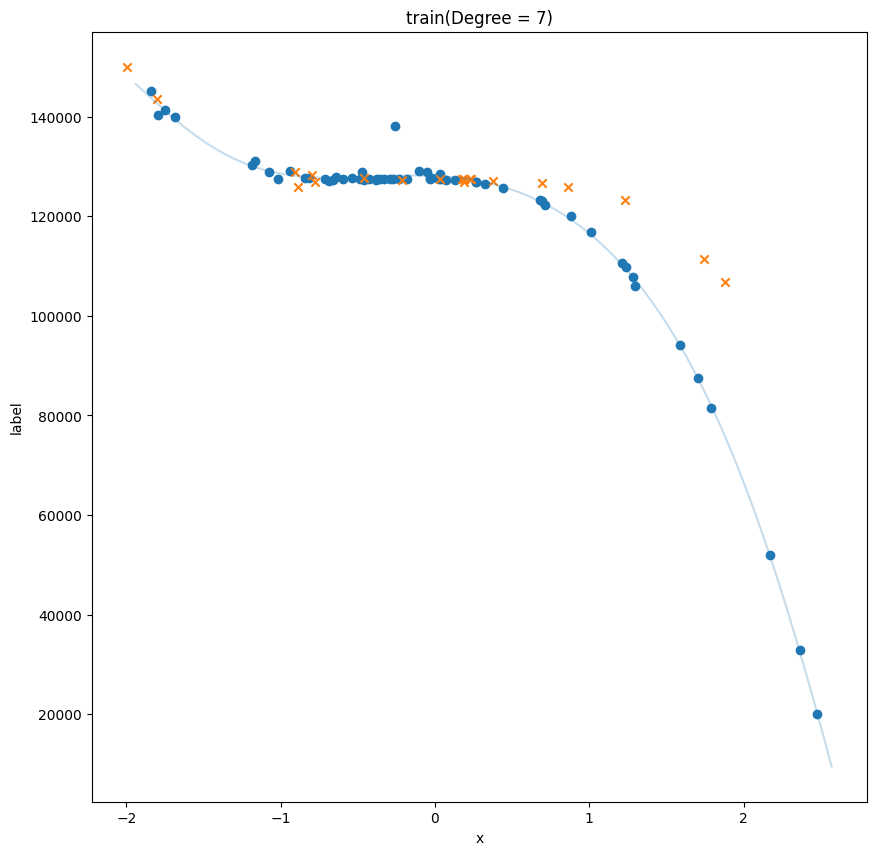

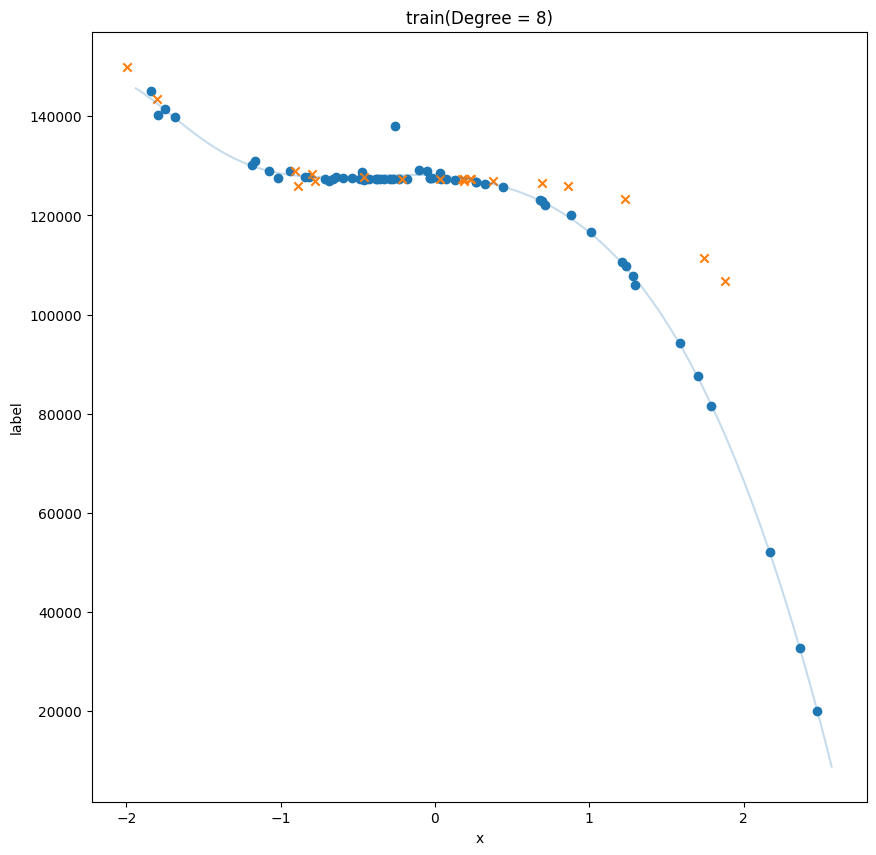

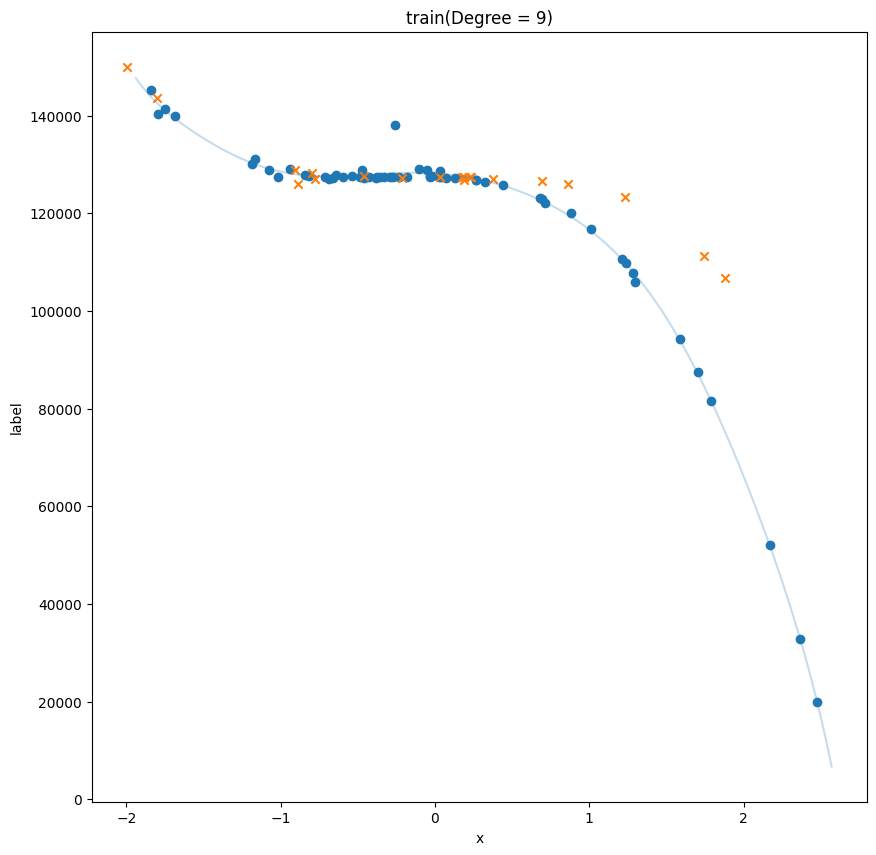

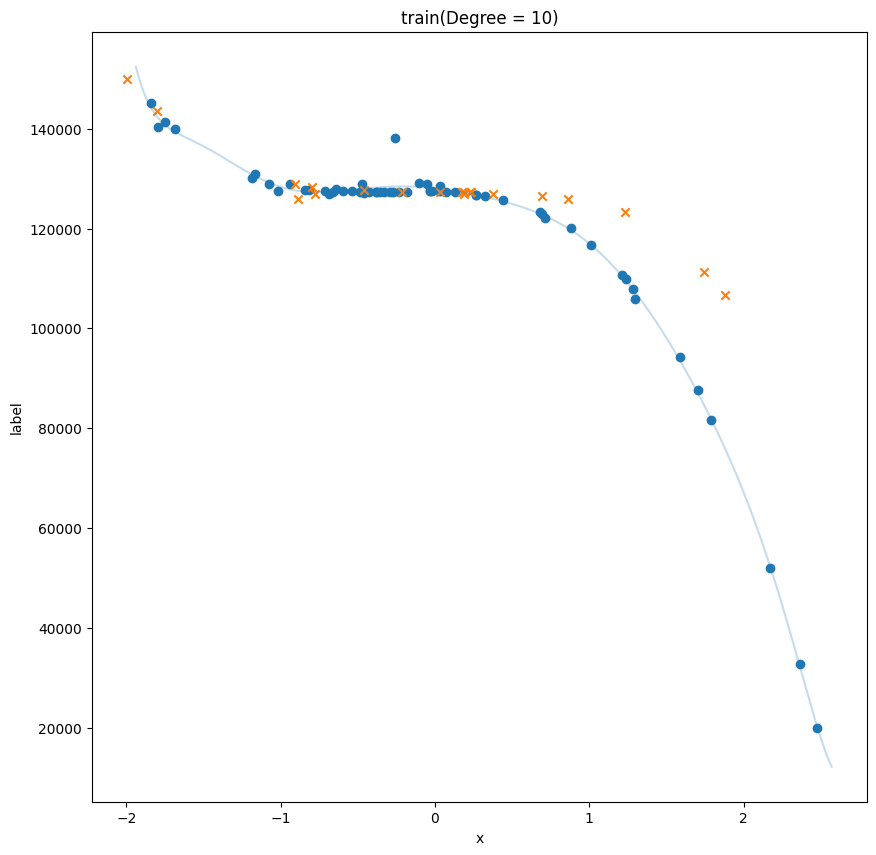

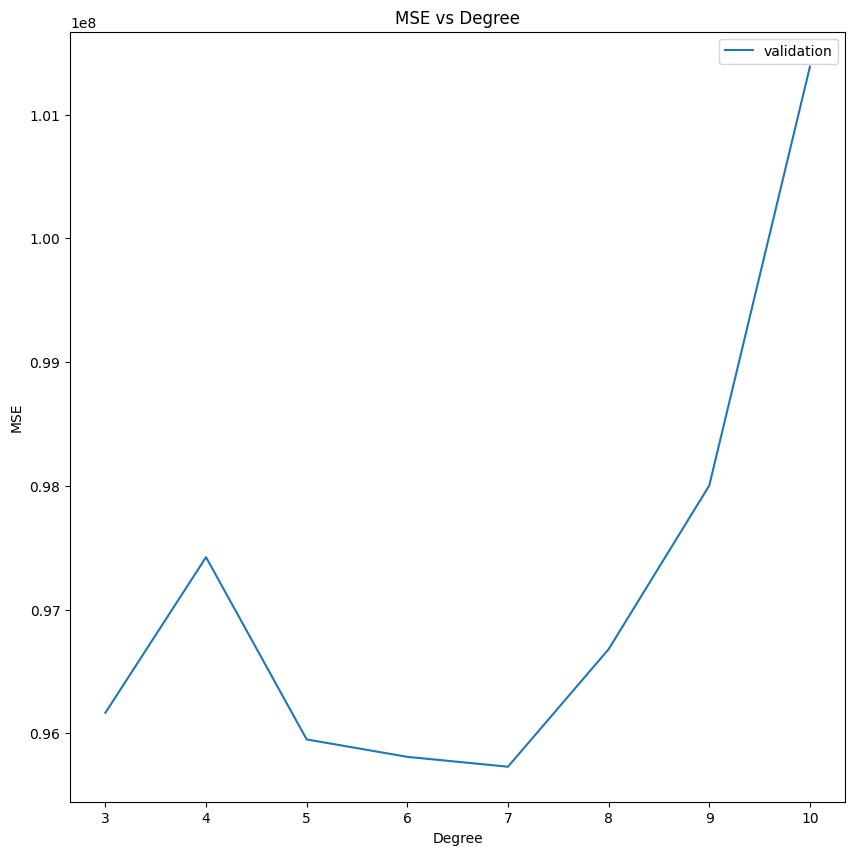

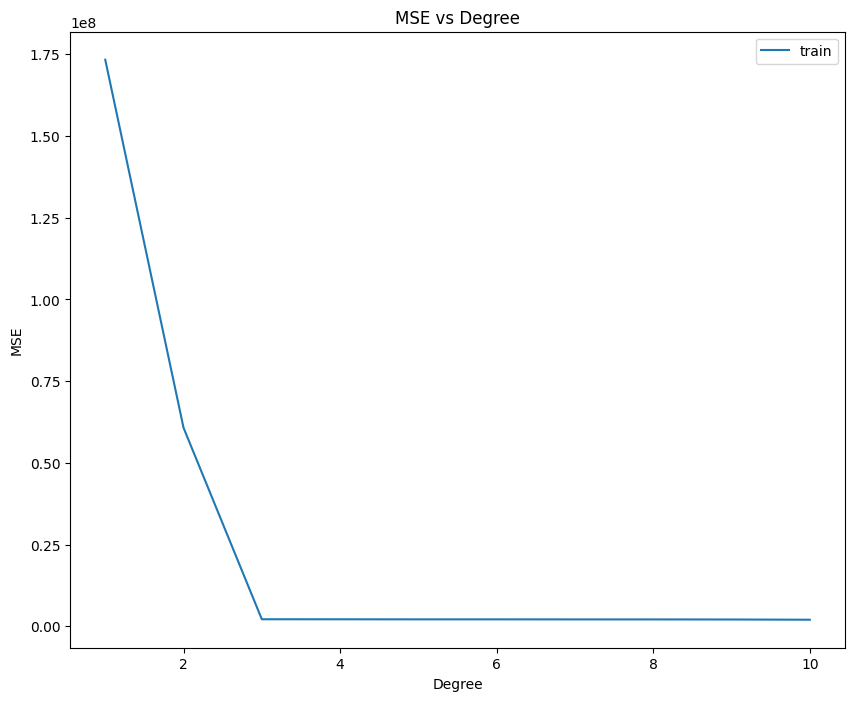

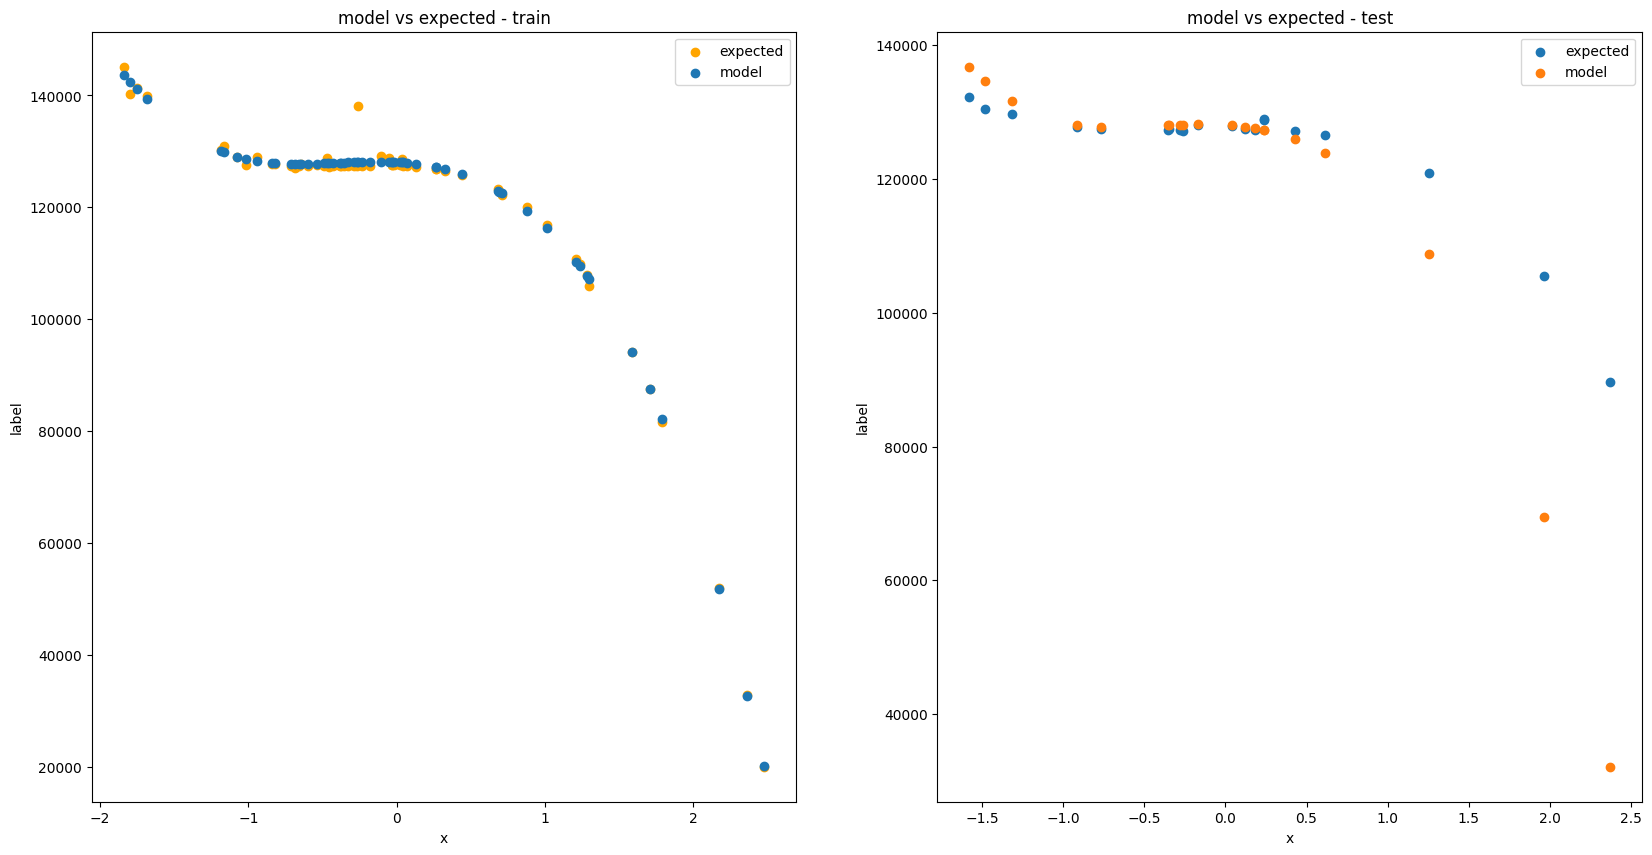

In [7]:
plot_best()